### Домашние задания для 3 урока

продвинутый pandas и визуализация данных

1 .Переменная names содержит в себе строку, где хранятся имена в формате 'Name1 Surname1, Name2 Surname2, …'. Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [ ]:
names_list = []
for i in names.split(', '):
    names_list.append(i)

2. В переменной df содержатся данные такого вида

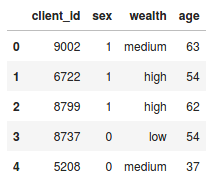

Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35. Поместите результат в переменную medium_35.


In [45]:
import pandas as pd

In [46]:
df = pd.DataFrame({
    'client_id': [9002, 6722, 8799, 8737, 5208],
    'sex': [1, 1, 1, 0, 0],
    'wealth': ['medium', 'high', 'high', 'low', 'medium'],
    'age': [63, 54, 62, 54, 37]
})
df.head()

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [47]:
medium_35 = df.query("wealth == 'medium' and age > 35")
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


3. Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант:

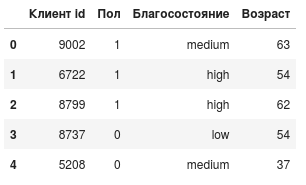


Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.

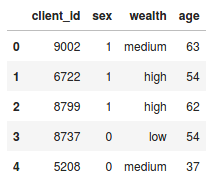

In [48]:
df = pd.DataFrame({
    'Клиент id': [9002, 6722, 8799, 8737, 5208],
    'Пол': [1, 1, 1, 0, 0],
    'Благосостояние': ['medium', 'high', 'high', 'low', 'medium'],
    'Возраст': [63, 54, 62, 54, 37]
})

In [49]:
df = df.rename(columns={
    'Клиент id': 'client_id',
    'Пол': 'sex',
    'Благосостояние': 'wealth',
    'Возраст': 'age'
})
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


4. Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булево значение)

In [50]:
df['older_than_30'] = df.age > 30
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


5. А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num.

In [51]:
unique_num = df.nunique()
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

6. У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида:

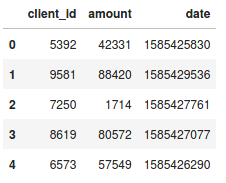

Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно)

Предыдущий датафрейм загружен в переменную df, новый – в data

In [52]:
data = {
    'client_id': [5392, 9581, 7250, 8619, 6573],
    'amount': [42331, 88420, 1714, 80572, 57549],
    'date': [1585425830, 1585429536, 1585427761, 1585427077, 1585426290]
}

data = pd.DataFrame(data)
data

,client_id,amount,date
0,5392,42331,1585425830
1,9581,88420,1585429536
2,7250,1714,1585427761
3,8619,80572,1585427077
4,6573,57549,1585426290


In [57]:
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


In [58]:
full_data = data.merge(df, on='client_id', how='inner')
full_data

,client_id,amount,date,sex,wealth,age,older_than_30


Датафрейм пуст, поскольку нет совпадений по id у таблиц

7. Теперь давайте создадим собственную функцию. Напишите функцию read_n_agg, которая:

* принимает на вход один параметр – путь к файлу
* считывает переданный файл, в котором разделителем является ;
* считает средний заработок (income) по каждой компании (company), перенося колонку company  индекс (as_index=True)
* возвращает результат этих действий (агрегированный датафрэйм)

In [59]:
url_data = 'https://raw.githubusercontent.com/88alexinho/data_analyst_karpov_course/refs/heads/main/3_companies.csv'

In [65]:
def read_n_agg(url: str) -> pd.DataFrame:
    data = pd.read_csv(url, sep=';')
    data = data.groupby('company').agg({'income': 'mean'})
    return data

In [66]:
read_n_agg(url_data)

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


8. Вернемся к данным по поездкам на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей.

journey_id – уникальный id поездки

user_id – id пользователя

driver_id – id водителя

taxi_id – id машины

icon – тип поездки

start_type – тип заказа (asap, reserved, delayed)

start_at – время начала поездки

start_lat – исходное местоположение пользователя, широта

start_lon – исходное местоположение пользователя, долгота

end_at – время окончания поездки

end_lat – итоговое местоположение, широта

end_lon – итоговое местоположение, долгота

end_state – состояние заказа

driver_start_lat – исходное местоположение водителя, широта

driver_start_lon – исходное местоположение водителя, долгота

arrived_at – время прибытия водителя

source – платформа, с которой сделан заказ

driver_score – оценка водителя клиентом

rider_score – оценка клиента водителем

Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file. Загрузите датасет, используя ; в качестве разделителя.

Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в переменную taxi.

In [71]:
url = 'https://raw.githubusercontent.com/88alexinho/data_analyst_karpov_course/refs/heads/main/3_taxi_peru.csv'

data_peru = pd.read_csv(url, 
                   parse_dates=['start_at', 'end_at', 'arrived_at'], sep=';')

data_peru.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


9. Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [73]:
import numpy as np

In [74]:
np.round(data_peru.source.value_counts() /  len(data_peru) * 100)

source
iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: count, dtype: float64